## Basit Dogrusal Regression

In [145]:
import pandas as pd 
ad = pd.read_csv("Advertising.csv")
df = ad.copy()
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [146]:
df = df.iloc[:,1:len(df)] # index hatasi duzeltildi

In [147]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [149]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [150]:
df.isnull().values.any() 

False

In [151]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


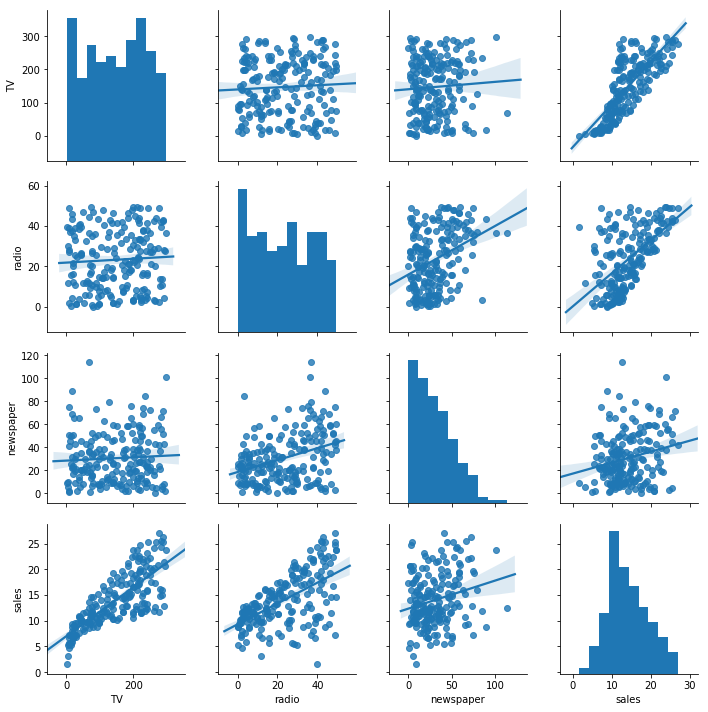

In [152]:
import seaborn as sns
sns.pairplot(df, kind = "reg")

* *TV ile satislar arasindaki iliski dikkat ceker.*

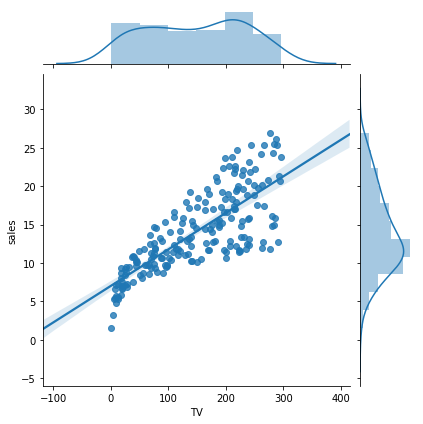

In [153]:
sns.jointplot(x = "TV", y = "sales", kind = "reg", data = df)

In [154]:
import statsmodels.api as sm

In [155]:
X = df[["TV"]]
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [156]:
X = sm.add_constant(X)
X.head()

C:\Users\90530\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [157]:
y = df["sales"] # sales bagimli degisken olarak aldik
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [158]:
lm = sm.OLS(y,X)

In [159]:
model = lm.fit()

In [160]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 13 Sep 2021   Prob (F-statistic):           1.47e-42
Time:                        14:01:53   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [161]:
model.params # katsayilar...

const    7.032594
TV       0.047537
dtype: float64

In [162]:
model.conf_int() #katsayi guvenilirligi

,0,1
const,6.129719,7.935468
TV,0.042231,0.052843


In [163]:
model.mse_model 

3314.618166868649

In [164]:
model.rsquared

0.611875050850071

In [165]:
model.fittedvalues[0:5] # tahmin degerleri...

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [166]:
Y[0:5] # gercek degerler

NameError: name 'Y' is not defined

In [ ]:
print("Sales = " + str(model.params[0]) + str(" + ") + str(model.params[1]) + str("x")) # model denklemi

### Sklearn ile dogrusal regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X = df[["TV"]]
y = df[["sales"]]
reg = LinearRegression()
model = reg.fit(X,y)
print("ksatsayilar = " +str(model.intercept_)+  str(model.coef_[0]))
#model.intercept_
#model.coef_


In [ ]:
model.score(X,y) # r**2

In [ ]:
model.predict(X)[0:10] # ilk 10 tahmin

#### Tahmın Bolumu

Model Denklemi: 
sales = 7.03 + TV * 0.04

Soru: 40 birim TV harcamasi satisi nasil etkiler?

In [ ]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X,y)

In [ ]:
7.03 + 40*(0.04)

In [ ]:
model.predict([[40]])

Biz kolay işlem olsun diye virgulden sonra 2 basamagi isleme soktuk fakat model daha hassas hesapladi. Aradaki farkin sebebi

In [ ]:
yeni_data = [[5], [20], [60]]

In [ ]:
model.predict(yeni_data) # birden fazla girdinin tahminini aldik

## Artıklar ve Makine Öğrenmesindeki Önemi

In [ ]:
reg.predict(X)[0:10] 
# OOP den dolayi yukarida yazdigimiz için model.predict yerine reg.predict kullanilabilir

In [167]:
y[0:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [168]:
control_table = pd.DataFrame({"gercek_y": y[0:10],"tahmin_y": reg.predict(X)[0:10]} )

NameError: name 'reg' is not defined

In [ ]:
control_table

In [169]:
control_table["hata_payi"] = control_table["gercek_y"] - control_table["tahmin_y"]

NameError: name 'control_table' is not defined

In [ ]:
control_table

Hata paylari su durumda toplamak dogru sonuc vermez cünkü hatalar yonlu olarak belirtilmis.Negatif pozitif degerlerin biririni goturmemesi lazım.

In [ ]:
control_table["hata_kare"] = control_table["hata_payi"]**2
# negatif buyuklukleri toplanirken korumak icin kare alindi

In [ ]:
control_table

In [170]:
import numpy as np
np.sum(control_table["hata_kare"])
# toplam hata

NameError: name 'control_table' is not defined

In [ ]:
np.mean(control_table["hata_kare"])
# Hata kare ortalamasi

In [ ]:
np.sqrt(np.mean(control_table["hata_kare"]))

# Çoklu Doğrusal Regresyon¶


In [ ]:
import pandas as pd
ad = pd.read_csv("Advertising.csv", usecols = [1,2,3,4])
df = ad.copy()
df.head()

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import statsmodels.api as sm

In [171]:
X = df.drop("sales", axis = 1)
y = df["sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)


In [172]:
X_train.shape,y_train.shape

((160, 3), (160,))

In [173]:
X_test.shape

(40, 3)

In [174]:
training = df.copy()

In [175]:
training.shape

(200, 4)

## 1-)Statsmodels yontemi ile model

* *Regresyon modelini eger daha cok yorumlama beklentimiz varsa statmodels kullanilir, daha genel yontem scikitlearn*

In [176]:
lm = sm.OLS(y_train, X_train)

In [177]:
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     2935.
Date:                Mon, 13 Sep 2021   Prob (F-statistic):          1.28e-137
Time:                        14:01:54   Log-Likelihood:                -336.65
No. Observations:                 160   AIC:                             679.3
Df Residuals:                     157   BIC:                             688.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* *Yukaridaki tablodan modele dahil ettigimiz butun degiskenlerin anlamli oldugunu saptadik*

In [178]:
model.summary().tables[1]
# katsayilar ve olmasi gereken araliklar

,coef,std err,t,P>|t|,[0.025,0.975]
TV,0.0531,0.001,36.467,0.000,0.050,0.056
radio,0.2188,0.011,20.138,0.000,0.197,0.240
newspaper,0.0239,0.008,3.011,0.003,0.008,0.040


## 2-)Scikit learn yontemi ile model

In [179]:
from sklearn.linear_model import LinearRegression


In [180]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [181]:
model.intercept_
#sabit katsayi

2.979067338122629

In [182]:
model.coef_
# diger degiskenlerin katsayilari

array([0.04472952, 0.18919505, 0.00276111])

In [183]:
model.predict(X)

array([20.61397147, 12.52942275, 12.62381325, 17.73087016, 13.27071976,
       12.82693587, 11.82149856, 12.09580733,  3.76381192, 12.46646769,
        7.09983872, 17.1342205 , 10.86633369,  8.79795773, 18.4598904 ,
       20.88988209, 13.25103464, 23.21214788, 10.00337695, 14.14222434,
       18.13614046, 14.62763575,  6.7146496 , 16.46055379,  8.20010235,
       15.4544819 , 14.94912051, 16.94141141, 19.29818677,  9.2767456 ,
       21.55384318, 11.42760282,  7.69340245, 18.6439566 ,  7.54498748,
       16.78110726, 23.2179245 , 15.7927809 , 10.0553326 , 20.39840652,
       16.34309555, 17.32216187, 21.35732668, 13.89573638,  9.08364737,
       15.15506967,  8.96290787, 21.61235394, 16.26867517,  8.2866632 ,
       12.59806415,  9.29612342, 20.65730881, 20.04956615, 20.22223086,
       21.3876709 ,  8.73628397, 12.74960716, 21.89621832, 18.01050913,
        5.80957448, 22.89655202, 16.69074263, 13.19615575, 17.0204516 ,
        7.82740305,  9.04831992, 11.98138077, 18.83109103, 21.05

### Tahmin asamasi<br>
model denklemi <br>
sales = 2.97 + TV * 0.04 + Radio * 0.18 + newspaper * 0.002 <br> 
soru : 40 birim TV, 10 birim Radio, 20 birim newspaper harcamasi sales üzerinde etkisi?

In [184]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [185]:
data = [[40],[10],[20]]
data = pd.DataFrame(data).T
# T islemi predict fonksiyonunn matris boyutuna uygun olmasi icin yapilir

In [186]:
model.predict(data)

array([6.71542087])

In [187]:
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

In [188]:
rmse
# egitim hatasi

1.644727765644337

In [189]:
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

In [190]:
rmse
# test seti hatasi

1.7815996615334502

### Model Tuning / Model Dogrulama

In [191]:
X = df.drop("sales", axis = 1)
y = df["sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.20, 
                                                    random_state= 144)
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [192]:
np.sqrt(mean_squared_error(y_train , model.predict(X_train)))

1.6748559274650712

In [193]:
model.score(X_train, y_train)
           

0.8971614078663419

* *Random state degistikce test hatasi ve score degisir.En uygun degeri bulmak icin cross validation yontemini kullaniriz*

In [194]:
cross_val_score(model, X_train, y_train, cv = 10, scoring = "r2").mean()
# ilk param model, 2. bagimsiz degiskenler, 3. bagimli degiskenler, 
# 4. param cross validation islemi yapilma sayisi

0.8733783298422942

* *model score ve cross_val_score farkini goruruz*

In [195]:
np.sqrt(-cross_val_score(model, X_train, y_train, cv = 10, 
                scoring = "neg_mean_squared_error").mean())

1.7461905497850763

* *Valide edilmis degerler bize daha gercekci bilgi saglar*

In [196]:
np.sqrt(-cross_val_score(model, 
                X_test, 
                y_test, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()

1.7399924960346644

In [197]:
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

1.6640263686701033

* *Ayni kiyaslamalar test seti uzerinden de yapilmali*

# PCR

* *Elimizde cok sayida degiskenli bir bilgi olsun. Bu bilgileri bir miktar bilgi kaybi goze alinarak daha az  degiskende gosterilebilecek sekilde indirgeyip regresyon yapilir.*

In [198]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
AtBat        263 non-null int64
Hits         263 non-null int64
HmRun        263 non-null int64
Runs         263 non-null int64
RBI          263 non-null int64
Walks        263 non-null int64
Years        263 non-null int64
CAtBat       263 non-null int64
CHits        263 non-null int64
CHmRun       263 non-null int64
CRuns        263 non-null int64
CRBI         263 non-null int64
CWalks       263 non-null int64
League       263 non-null object
Division     263 non-null object
PutOuts      263 non-null int64
Assists      263 non-null int64
Errors       263 non-null int64
Salary       263 non-null float64
NewLeague    263 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 43.1+ KB


In [200]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [201]:
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


kategorik degiskenleri dummy degisken formatına getiririz. Dummy degisken tuzagi tespit edilir duzenleme yapilir

In [202]:
y = df["Salary"]

In [203]:
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")

In [204]:
X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [205]:
X = pd.concat([X_, dms[["League_N", "Division_W","NewLeague_N"]]], axis = 1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = df.copy()

print("training", training.shape)

X_train (197, 19)
y_train (197,)
X_test (66, 19)
y_test (66,)
training (263, 20)


scikitlearn direkt PCR uygulamasi barindirmadigi icin kendimiz uygulayacagiz. Once PCA islemi gerceklestirip buldugumuz PCA uzerine regresyon uygulayacagiz.

In [207]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
pca = PCA()

In [208]:
X_reduced_train = pca.fit_transform(scale(X_train))

C:\Users\90530\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


sadece fit kullansaydik model nesnesi olusacakti. transform islemi ise boyut indirgeme islemini yapar. Tek cagrida iki islem yapmis olduk.

In [209]:
X_reduced_train[0:1,:]  

array([[-2.49569913e+00, -3.37762397e-01,  7.06391950e-01,
        -1.32791025e+00, -8.21824333e-01, -6.62790677e-01,
        -6.56764789e-01,  3.68093279e-02, -2.03665105e-01,
         1.76134815e-01, -9.20131987e-02,  2.40129020e-01,
        -3.60473661e-03, -3.41246327e-02,  4.32799605e-02,
         1.02996923e-01,  3.70733348e-03,  1.37933445e-03,
        -6.63814471e-03]])

In [210]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:5]

array([38.18, 59.88, 70.88, 78.88, 84.18])

In [211]:
lm = LinearRegression()

In [212]:
pcr_model = lm.fit(X_reduced_train, y_train)

In [213]:
pcr_model.intercept_

543.4834416243655

In [214]:
pcr_model.coef_

array([ 111.13977427,  -29.34209502,   26.29799759,  -38.47549852,
        -56.9200785 ,   54.44779423,   40.77493384,  -23.72746012,
          9.31198164,   13.02031672,   45.58357748,   31.97791627,
         18.93930958, -115.60940171,   24.00382778,  415.70806202,
       -449.51779543,  563.07375399,  302.53718462])

## Tahmin

In [215]:
y_pred = pcr_model.predict(X_reduced_train)

In [216]:
y_pred[0:5]

array([377.44484744, 802.19452124, 495.60987745, 112.53177731,
       426.21613066])

In [217]:
np.sqrt(mean_squared_error(y_train, y_pred))

289.3292825564977

In [218]:
df["Salary"].mean()

535.9258821292775

In [219]:
r2_score(y_train, y_pred)

0.5770075250410178

In [220]:
pca2 = PCA()

In [221]:
X_reduced_test = pca2.fit_transform(scale(X_test))

C:\Users\90530\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [222]:
y_pred = pcr_model.predict(X_reduced_test)

In [223]:
np.sqrt(mean_squared_error(y_test, y_pred))

405.15753641499646

## Model Tuning

In [224]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

390.79142556822234


In [225]:
from sklearn import model_selection

In [226]:
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)

In [227]:
lm = LinearRegression()

In [228]:
RMSE = []

In [229]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

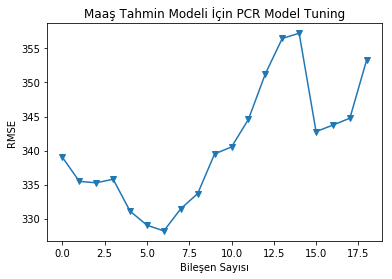

In [230]:
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Maaş Tahmin Modeli İçin PCR Model Tuning');

In [231]:
lm = LinearRegression()

In [232]:
pcr_model = lm.fit(X_reduced_train[:,0:6], y_train)

In [233]:
y_pred = pcr_model.predict(X_reduced_train[:,0:6])

In [234]:
print(np.sqrt(mean_squared_error(y_train, y_pred)))

308.82659830945016


In [235]:
y_pred = pcr_model.predict(X_reduced_test[:,0:6])

In [236]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

393.1198700096223


In [237]:
import pandas as pd
import numpy as np
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
AtBat        263 non-null int64
Hits         263 non-null int64
HmRun        263 non-null int64
Runs         263 non-null int64
RBI          263 non-null int64
Walks        263 non-null int64
Years        263 non-null int64
CAtBat       263 non-null int64
CHits        263 non-null int64
CHmRun       263 non-null int64
CRuns        263 non-null int64
CRBI         263 non-null int64
CWalks       263 non-null int64
League       263 non-null object
Division     263 non-null object
PutOuts      263 non-null int64
Assists      263 non-null int64
Errors       263 non-null int64
Salary       263 non-null float64
NewLeague    263 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 43.1+ KB


In [239]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [240]:
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [241]:
y = df["Salary"]

In [242]:
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")

In [243]:
X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [244]:
X = pd.concat([X_, dms[["League_N", "Division_W","NewLeague_N"]]], axis = 1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = df.copy()

print("training", training.shape)

X_train (197, 19)
y_train (197,)
X_test (66, 19)
y_test (66,)
training (263, 20)


In [246]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
pca = PCA()

In [247]:
X_reduced_train = pca.fit_transform(scale(X_train))

C:\Users\90530\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [248]:
X_reduced_train[0:1,:]

array([[-2.49569913e+00, -3.37762397e-01,  7.06391950e-01,
        -1.32791025e+00, -8.21824333e-01, -6.62790677e-01,
        -6.56764789e-01,  3.68093279e-02, -2.03665105e-01,
         1.76134815e-01, -9.20131987e-02,  2.40129020e-01,
        -3.60473661e-03, -3.41246327e-02,  4.32799605e-02,
         1.02996923e-01,  3.70733348e-03,  1.37933445e-03,
        -6.63814471e-03]])

In [249]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:5]

array([38.18, 59.88, 70.88, 78.88, 84.18])

In [250]:
lm = LinearRegression()

In [251]:
pcr_model = lm.fit(X_reduced_train, y_train)

In [252]:
pcr_model.intercept_

543.4834416243655

In [253]:
pcr_model.coef_

array([ 111.13977427,  -29.34209502,   26.29799759,  -38.47549852,
        -56.9200785 ,   54.44779423,   40.77493384,  -23.72746012,
          9.31198164,   13.02031672,   45.58357748,   31.97791627,
         18.93930958, -115.60940171,   24.00382778,  415.70806202,
       -449.51779543,  563.07375399,  302.53718462])

## Tahmin

In [254]:
y_pred = pcr_model.predict(X_reduced_train)

In [255]:
y_pred[0:5]

array([377.44484744, 802.19452124, 495.60987745, 112.53177731,
       426.21613066])

In [256]:
np.sqrt(mean_squared_error(y_train, y_pred))

289.3292825564977

In [257]:
df["Salary"].mean()

535.9258821292775

In [258]:
r2_score(y_train, y_pred)

0.5770075250410178

In [259]:
pca2 = PCA()

In [260]:
X_reduced_test = pca2.fit_transform(scale(X_test))

C:\Users\90530\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [261]:
y_pred = pcr_model.predict(X_reduced_test)

In [262]:
np.sqrt(mean_squared_error(y_test, y_pred))

405.15753641499646

## Model Tuning

In [263]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

390.79142556822234


Pcr model tuningte bilesen sayisini optimize edilir. Elimizdeki hata degerleri butun bilesenle kurulan modele ait. Yukarida 10 bilesendeki hata degerini goruruz.

In [264]:
from sklearn import model_selection

In [265]:
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True, 
                             random_state = 1)

shuffle parametresi gruplara ayrilmadan once verilerin karistirilip karistirilmama durumunu sorar

In [266]:
lm = LinearRegression()

In [267]:
RMSE = []

In [268]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

her olasi bilesen icin brute force ile cross valdiation yapip rmse degerlerini hesaplariz, parametre optimizasyonunu yapmis oluruz.

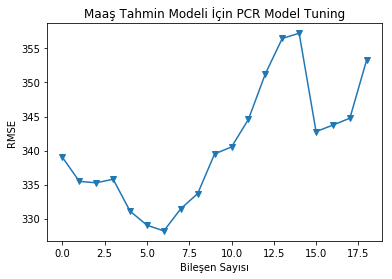

In [269]:
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Maaş Tahmin Modeli İçin PCR Model Tuning');

ideal bilesen sayisini 6 tespit ettik.

In [270]:
lm = LinearRegression()

In [271]:
pcr_model = lm.fit(X_reduced_train[:,0:6], y_train)

In [272]:
y_pred = pcr_model.predict(X_reduced_train[:,0:6])

In [273]:
print(np.sqrt(mean_squared_error(y_train, y_pred)))

308.82659830945016


In [274]:
y_pred = pcr_model.predict(X_reduced_test[:,0:6])

In [275]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

393.1198700096223


# PLS

Degiskenlerin daha az sayiya, aralarinda coklu odgrusal baglanti problemi olmayan "bilesenlere" indirgenip regresyon mdeli kurulmasina dayalidir.

* PCR yonteminden farki ise: PCR yonteminde bagimsiz degiskenlerin kendi icindeki kombinasyonlarina bakilarak bilesen olustururken,
        PLC yonteminde bilesenler olusturulurken bagimsiz degiskenlerin bagimli degiskenle olan iliskisi de goz onune alinir.
* Degiskenler atilmak istenmşyorsa ve acikalanabilirlik araniyorsa PLS
* PLC gozetimli boyut indirgeme, PCR gozetimsiz boyut indirgeme(gozetimden kasit bagimli degiskenle olan iliski)
* İki yontemde de tunning parametresi bilesen sayisidir.
* Optimum bilesen sayisi bulmak icin CV kullanilir

In [276]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [277]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [278]:
pls_model = PLSRegression(n_components = 6).fit(X_train, y_train)
# 6 bilesen olusturmasini istedik

In [279]:
pls_model.coef_ 

array([[-108.74143193],
       [ 197.6386967 ],
       [  22.57338481],
       [  26.52768741],
       [ -25.67952167],
       [  54.16363009],
       [ -25.89997437],
       [   5.36637756],
       [  89.44665343],
       [  26.79039104],
       [ 102.43239418],
       [  68.82932424],
       [ -61.11470635],
       [  94.44121847],
       [  26.38215013],
       [ -45.01850138],
       [  77.17773908],
       [ -35.85447586],
       [ -45.66863853]])

bilesen sayisini istedigimiz degeri yazalim burada her zaman degisken sayisi kadar gozlem cikar. Bu gozlem degerleri bizim yazdigimiz bilesen sayisi icin isleme alinir.

## Tahmin

In [280]:
pls_model.predict(X_train)[0:10]

array([[ 341.05563915],
       [ 818.68494511],
       [ 609.92707458],
       [ 125.15977454],
       [ 458.61602947],
       [1043.93221907],
       [ 172.32918764],
       [ 317.29628026],
       [ 518.8844206 ],
       [ 915.63364085]])

In [281]:
y_pred = pls_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))


298.01843205816147

In [282]:
r2_score(y_train, y_pred)

0.5512193616082299

In [283]:
y_pred = pls_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

370.20535521687447

## Model Tuning

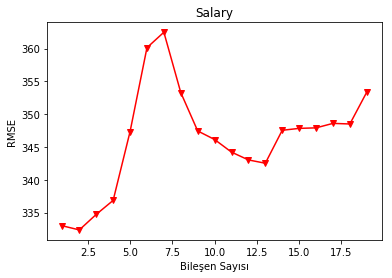

In [284]:
#Cross Validation
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)


#Hata hesaplamak için döngü
RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

#Sonuçların Görselleştirilmesi
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Salary');

Bilesen sayimiz 2 secilecektir.

In [285]:
pls_model = PLSRegression(n_components = 2).fit(X_train, y_train)

In [286]:
y_pred = pls_model.predict(X_test)

In [287]:
np.sqrt(mean_squared_error(y_test, y_pred))

398.09956327448526

# RİDGE REGRESYON

* Hata kareler toplamini minimize edene katsayilari bu katsayilaraceze uygulayarak bulmaktir.

* Yanlidir fakat varyans düsüktür.
* Cok boyutluluga cozum sunar.
* Coklu dogrusal baglanti problemlerinde iyidir.
* Tum degiskenler ile model kurar, ilgisiz degiskenleri modelden cikarmazz katsayilarini dusurur.
* λ onemli roldedir. Ceza terimi icin ayar parametresidir.
* λ icin iyi bir deger bulmak onemlidir CV yontemi kullanilir.

In [288]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [289]:
from sklearn.linear_model import Ridge

In [290]:
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train) 

alpha = λ

In [291]:
ridge_model 

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [292]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [293]:
10**np.linspace(10,-2,100)*0.5 # bu lambda degerlerini gozlemleyelim

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

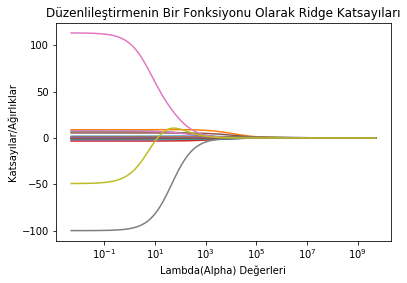

In [294]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train) 
    katsayilar.append(ridge_model.coef_) 
    

    
ax = plt.gca()
ax.plot(lambdalar, katsayilar) 
ax.set_xscale('log') 

plt.xlabel('Lambda(Alpha) Değerleri')
plt.ylabel('Katsayılar/Ağırlıklar')
plt.title('Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları');

* Her iterasyonda yukarida random olusturdugumuz lambda degerleriyle model kurup katsayilari gozlemleyecegiz.

## Tahmin

In [295]:
y_pred = ridge_model.predict(X_test)

In [296]:
np.sqrt(mean_squared_error(y_test, y_pred))

357.05179222828366

## Model Tuning

In [297]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 

In [298]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = lambdalar, 
                   scoring = "neg_mean_squared_error", 
                   normalize = True )

In [299]:
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000e+09, 3.78232e+09, ..., 6.60971e-03, 5.00000e-03]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=True,
    scoring='neg_mean_squared_error', store_cv_values=False)

In [300]:
ridge_cv.alpha_ # optimum lambda degerine ulastik

0.7599555414764666

In [301]:
ridge_tuned = Ridge(alpha = ridge_model.alpha, 
                   normalize = True).fit(X_train, y_train)

In [302]:
ridge_tuned

Ridge(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [303]:
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))

358.93631089385997

# LASSO REGRESYON

* Hata kareler toplamini minimize eden katsayilari onlara ceza uygulayarak bulur

* Bu islemi yaparken cezalardan dolayi bazi katsayilari 0 yapar boylece degisken elemis olur Ridgeden bariz farki budur.

## Model

In [304]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [305]:
from sklearn.linear_model import Lasso

In [306]:
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)

C:\Users\90530\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [307]:
lasso_model

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [308]:
lasso_model.coef_

array([-1.72206506e+00,  8.56210197e+00,  6.91175137e+00, -3.13240128e+00,
       -2.00771676e+00,  5.36159035e+00,  8.86871593e+00, -1.69520371e-01,
       -5.58121413e-02, -3.53962588e-01,  1.70961000e+00,  6.40603469e-01,
       -6.58519895e-01,  2.60093222e-01,  2.78717030e-01, -5.92690965e-01,
        1.12659630e+02, -9.99652090e+01, -4.81289395e+01])

C:\Users\90530\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\90530\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\90530\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\90530\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

Text(0, 0.5, 'weights')

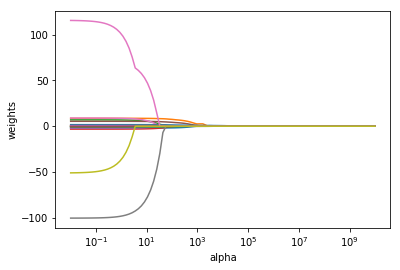

In [309]:
lasso = Lasso()
lambdalar = 10**np.linspace(10,-2,100)*0.5 
katsayilar = []

for i in lambdalar:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    katsayilar.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

## Tahmin

In [310]:
lasso_model.predict(X_test)

array([ 613.88833029,  701.97056731, 1005.55539526,  414.08312603,
        399.18417127,  344.71444139,  664.86990217,  451.60757   ,
        914.64492066,  644.67006406,  691.60613554,  884.71702368,
        210.04523766,  446.12527252,  262.94922087,  499.22332142,
        805.2275034 ,   43.49230343, 1250.49322312,  316.34470193,
        422.96656686,  743.29944548,  572.90774248,  655.15609074,
        618.96407069,  200.75845796,  882.64622066,  254.06366112,
        430.25494812,   84.17391461,  143.60312305,  130.61554   ,
        363.74498233,  461.7321162 ,  273.42345417,  244.49816262,
       1324.62748553,  107.89909718,  135.63065031,  242.72630885,
         51.70024086,  297.57598929,  586.86143037,  398.85227639,
        763.99543074,  690.10003532,  344.06272851,  247.43966241,
        255.13234043,  662.89091837,  765.66189   ,  313.57347726,
        765.84996179,  189.77235179,  283.98765436,  589.95238974,
        663.31166365,  803.29524626,  164.99767232, 1170.24294

In [311]:
y_pred = lasso_model.predict(X_test)

In [312]:
np.sqrt(mean_squared_error(y_test, y_pred))

356.7545270148768

## Model Tuning

In [313]:
from sklearn.linear_model import LassoCV

In [314]:
lasso_cv_model = LassoCV(alphas = None, 
                         cv = 10, 
                         max_iter = 10000, 
                         normalize = True).fit(X_train, y_train)

* Bir alpha degeri atamadik kendi ontanimli degeri kullanmasini bekledik

In [315]:
lasso_cv_model.alpha_

0.3940612643247005

In [316]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)

In [317]:
lasso_tuned.fit(X_train, y_train)

C:\Users\90530\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.3940612643247005, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [318]:
y_pred = lasso_tuned.predict(X_test)

In [319]:
np.sqrt(mean_squared_error(y_test, y_pred))

356.52263769583675

# ElasticNet Regresyonu

* EKK minimize eden katsayilari onlara ceza uygulayarak bulur.

* L1 ve L2 yaklasimi benimser.
* İki adet ayar parametresi bulundurur.
* Ridge tarzi cezalandirma, Lasso tarzi degisken secmeyi bir araya getirerek calisir.

## Model

In [320]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [321]:
from sklearn.linear_model import ElasticNet

In [322]:
enet_model = ElasticNet().fit(X_train, y_train)

C:\Users\90530\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [323]:
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

## Tahmin

In [324]:
y_pred = enet_model.predict(X_test)

In [325]:
np.sqrt(mean_squared_error(y_test, y_pred))

357.16765481812433

In [326]:
r2_score(y_test, y_pred)

0.41070222469326956

## Model Tuning



In [327]:
from sklearn.linear_model import ElasticNetCV

In [328]:
enet_cv_model = ElasticNetCV(cv = 10, random_state = 0).fit(X_train, y_train)

In [329]:
enet_cv_model

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
       normalize=False, positive=False, precompute='auto', random_state=0,
       selection='cyclic', tol=0.0001, verbose=0)

* l1_ratio parametresi 0 olunca L2, 1 olunca L1 cezalandirmasi yapar.Yani 0-1 arasindaki degisimi cezalandirma metodlarının etkilerini ifade eder.Default deger olan 0.5 iki cezalandirmayi da esit etkide tutar. 

In [330]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train, y_train)

In [331]:
y_pred = enet_tuned.predict(X_test)

In [332]:
np.sqrt(mean_squared_error(y_test, y_pred))

394.15280563218795